In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')    # Use dark background for plots

import qibo
assert qibo.__version__ >= "0.2.20", "This script requires qibo version 0.2.20 or higher."

from qibo import Circuit, gates
from qibo.gates import *

from qibo.ui import plot_circuit, plot_density_hist, visualize_state

from qibo_qec import QEC

custom_style = {                    # Define a custom style for the circuit plot
    "facecolor" : "#000000",
    "edgecolor" : "#ffffff",
    "linecolor" : "#ffffff",
    "textcolor" : "#ffffff",
    "fillcolor" : "#c41b1b",
    "gatecolor" : "#9000ff",
    "controlcolor" : "#360000"
}

Initialized QEC with code type: bit_flip
Applying bit_flip code to a circuit with 15 qubit(s).
[]


Text(0.5, 1.0, 'Circuit after applying Bit-Flip QEC')

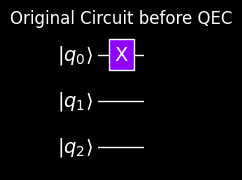

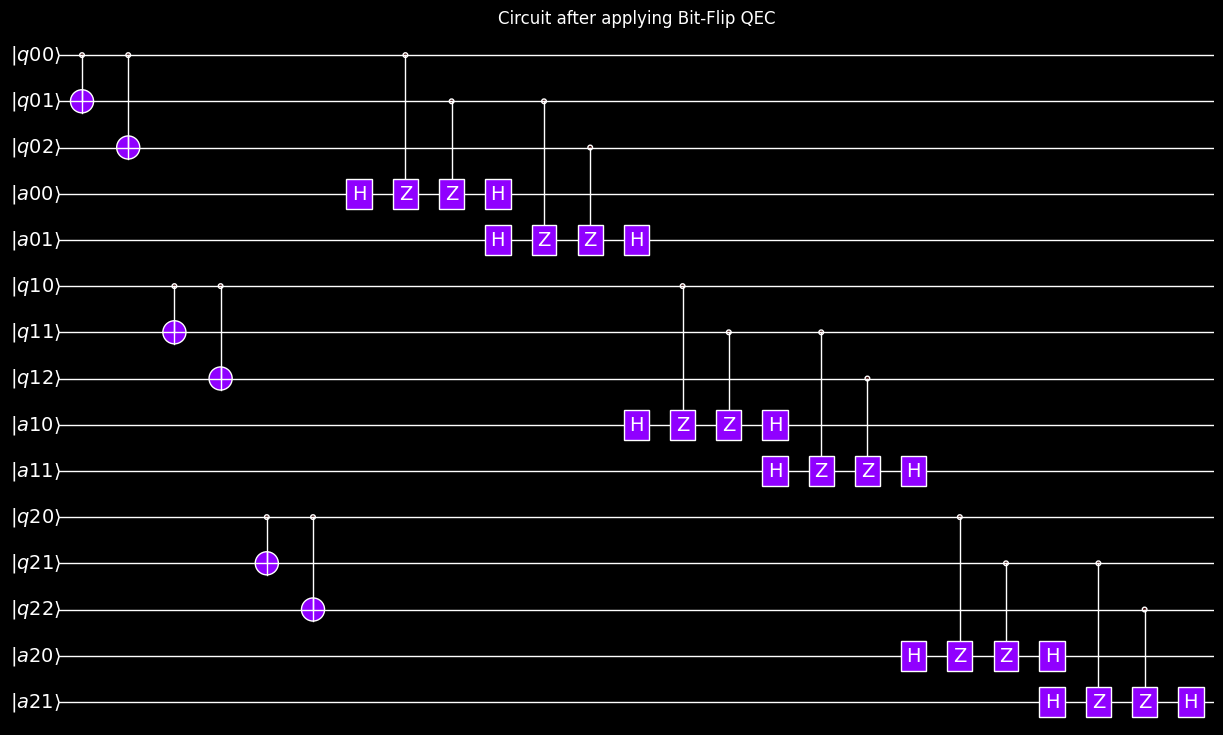

In [2]:
qc = Circuit(3)

qc.add(gates.X(0))

plot_circuit(qc, style=custom_style)
plt.title("Original Circuit before QEC")
# plt.savefig("etc/circuit_before_qec.png", dpi=300, bbox_inches='tight')

qec = QEC(code_type="bit_flip")
encoded_circuit = qec.apply_code(qc)

plot_circuit(encoded_circuit, style=custom_style)
plt.title("Circuit after applying Bit-Flip QEC")
# plt.savefig("etc/circuit_after_qec.png", dpi=300, bbox_inches='tight')